In [27]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

#img=cv2.imread(r'E:\me.jpg')

img=cv2.imread(r'C:\Users\Pratham\Sports_person_Project\model\image data\virat kohli\Virat-Kohli-1-1.jpg')
img.shape

(400, 640, 3)

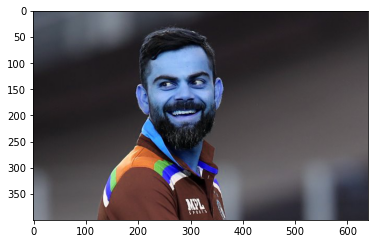

In [28]:
plt.imshow(img)

(400, 640)

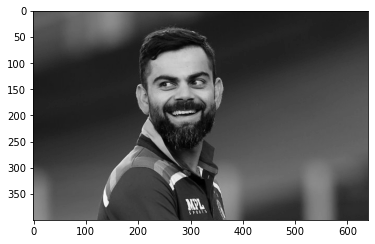

In [29]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
gray.shape

In [30]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade=cv2.CascadeClassifier(r'C:\Users\Pratham\Sports_person_Project\model\opencv\haarcascades\haarcascade_eye.xml')

face=face_cascade.detectMultiScale(gray, 1.3, 5)
face

array([[203,  72, 167, 167]], dtype=int32)

In [31]:
x,y,w,h=face[0]
#x1,y1,w1,h1=face[1]
x,y,w,h

(203, 72, 167, 167)

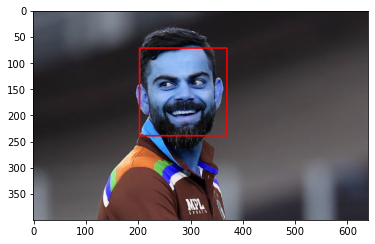

In [32]:
cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(img)
#face_img1=cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
#plt.imshow(face_img1)

# For Eyes

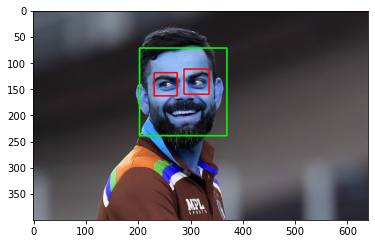

In [33]:
for (x,y,w,h) in face:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

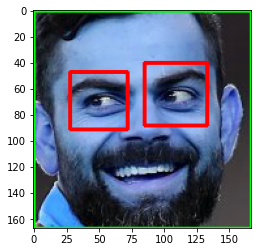

In [34]:
plt.imshow(roi_color,cmap='gray')

In [35]:
crop_img=np.array(roi_color)
crop_img.shape

(167, 167, 3)

In [36]:
def crop_if_2_eyes(img_path):
    img=cv2.imread(img_path)
    if img is None:
        return
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    roi_colors=[]
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eyes_cascade.detectMultiScale(roi_gray)
        if(len(eyes)>=2):
            roi_colors.append(roi_color)
    if len(roi_colors)==0:
        return 0
    else:
        return roi_colors


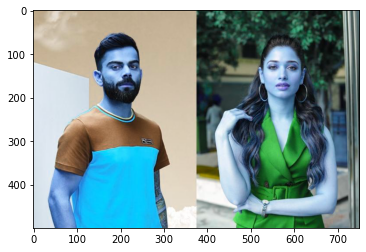

In [37]:
image=cv2.imread(r'C:\Users\Pratham\Sports_person_Project\model\image data\virat kohli\ViratKohli_Tamannaah_1200.jpg')
plt.imshow(image)

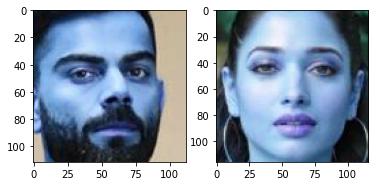

In [38]:
cropped_image=crop_if_2_eyes(r'C:\Users\Pratham\Sports_person_Project\model\image data\virat kohli\ViratKohli_Tamannaah_1200.jpg')
plt.subplot(1,2,1)
plt.imshow(cropped_image[0])
plt.subplot(1,2,2)
plt.imshow(cropped_image[1])

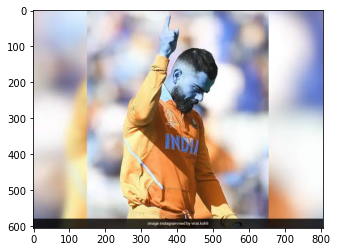

In [39]:
obstructed_image=cv2.imread(r'C:\Users\Pratham\Sports_person_Project\model\image data\virat kohli\ec6i2tko_virat-kohli-instagram_.jpg')
plt.imshow(obstructed_image)

In [40]:
new_image=crop_if_2_eyes(r'C:\Users\Pratham\Sports_person_Project\model\image data\virat kohli\ec6i2tko_virat-kohli-instagram_.jpg')
#if cropped_image is None:
#    print("Null")
new_image

0

In [41]:
path_data="./image data/"
path_crop="./image data/cropped/"

# to remove any folder or directory 

In [42]:
import shutil
import os
if os.path.exists(path_crop):
    shutil.rmtree(path_crop)


In [43]:
import os
img_dirs=[]
for directory in os.scandir(path_data):
    if directory.is_dir():
        img_dirs.append(directory.path)


In [44]:
img_dirs

['./image data/jasprit_bumrah',
 './image data/k_l_rahul',
 './image data/m_s_dhoni',
 './image data/rishabh pant',
 './image data/rohit_sharma',
 './image data/shikhar_dhawan',
 './image data/virat kohli']

# to make any folder or directory

In [45]:
os.mkdir(path_crop)

In [46]:
cropped_img_dirs=[]
cropped_file_name_dict={}
for img_dir in img_dirs:
    count=1
    celeb_name=img_dir.split('/')[-1]
    print(celeb_name)
    cropped_file_name_dict[celeb_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=crop_if_2_eyes(entry.path)
        if roi_color!=0 and roi_color is not None:
            cropped_folder=path_crop+celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating Cropped Folder:",cropped_folder)
            for i in range(0,len(roi_color)):    
                cropped_file_name=celeb_name+str(count)+".jpg"
                cropped_file_path=cropped_folder+'/'+cropped_file_name
            
                cv2.imwrite(cropped_file_path,roi_color[i])
                count+=1
                cropped_file_name_dict[celeb_name].append(cropped_file_path)
    

jasprit_bumrah
Generating Cropped Folder: ./image data/cropped/jasprit_bumrah
k_l_rahul
Generating Cropped Folder: ./image data/cropped/k_l_rahul
m_s_dhoni
Generating Cropped Folder: ./image data/cropped/m_s_dhoni
rishabh pant
Generating Cropped Folder: ./image data/cropped/rishabh pant
rohit_sharma
Generating Cropped Folder: ./image data/cropped/rohit_sharma
shikhar_dhawan
Generating Cropped Folder: ./image data/cropped/shikhar_dhawan
virat kohli
Generating Cropped Folder: ./image data/cropped/virat kohli


# Wavelet Transform 

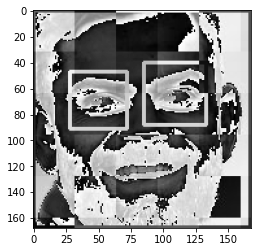

In [47]:
import pywt
def wavelet(img,mode='haar',level=1):
    wave_img=img
    wave_img=cv2.cvtColor(wave_img,cv2.COLOR_RGB2GRAY)
    wave_img=np.float32(wave_img)
    wave_img/=255
    coeffs=pywt.wavedec2(wave_img,mode,level=level)
    coeffs_h=list(coeffs)
    coeffs_h[0]*=0;
    wave_img_h=pywt.waverec2(coeffs_h,mode)
    wave_img_h*=255
    wave_img_h=np.uint8(wave_img_h)
    return wave_img_h
#crop=crop_if_2_eyes(r'C:\Users\Pratham\Sports_person_Project\model\image data\virat kohli\Virat-Kohli-1-1.jpg')
#crop_im=np.array(crop,dtype=np.uint8)
img_wave=wavelet(crop_img,'db1',5)
plt.imshow(img_wave,cmap='gray')

In [48]:
cropped_file_name_dict

{'jasprit_bumrah': ['./image data/cropped/jasprit_bumrah/jasprit_bumrah1.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah2.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah3.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah4.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah5.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah6.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah7.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah8.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah9.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah10.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah11.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah12.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah13.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah14.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah15.jpg',
  './image data/cropped/jasprit_bumrah/jasprit_bumrah16.jpg',

In [49]:
celeb_dict={}
count=0
for celeb in cropped_file_name_dict.keys():
    celeb_dict[celeb]=count
    count+=1
celeb_dict    

{'jasprit_bumrah': 0,
 'k_l_rahul': 1,
 'm_s_dhoni': 2,
 'rishabh pant': 3,
 'rohit_sharma': 4,
 'shikhar_dhawan': 5,
 'virat kohli': 6}

In [50]:
x,y=[],[]
for celeb,img_file in cropped_file_name_dict.items():
    for images in img_file:
        img=cv2.imread(images)
        if img is None:
            continue
        scalled_img=cv2.resize(img,(32,32))
        img_har=wavelet(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(celeb_dict[celeb])
        

In [51]:
len(x)

184

In [52]:
len(y)

184

In [53]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(184, 4096)

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('lr',LogisticRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

C:\Users\Pratham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6521739130434783

In [56]:
len(X_train)

138

In [57]:
len(X_test)

46

In [58]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.40      0.67      0.50         6
           2       1.00      0.67      0.80         9
           3       0.75      0.75      0.75         4
           4       0.67      0.29      0.40         7
           5       0.50      0.25      0.33         4
           6       0.57      0.80      0.67        10

    accuracy                           0.65        46
   macro avg       0.68      0.63      0.62        46
weighted avg       0.69      0.65      0.64        46



In [59]:
models={
    'svm':{
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100],
            'svc__kernel':['rbf','linear']
        }
    },
    'Logistic Regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    },
    'Random Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    }
}

In [60]:
scores=[]
best_estimators={}
for algo,mp in models.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'Best_score':clf.best_score_,
        'Best_parameters':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
df=pd.DataFrame(scores,columns=['model','Best_score','Best_parameters'])
df

,model,Best_score,Best_parameters
0,svm,0.580688,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,Logistic Regression,0.610317,{'logisticregression__C': 1}
2,Random Forest,0.340212,{'randomforestclassifier__n_estimators': 10}


In [61]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'Logistic Regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'Random Forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))])}

In [62]:
best_estimators['Logistic Regression'].score(X_test,y_test)

0.8043478260869565

In [63]:
best_estimators['svm'].score(X_test,y_test)

0.5652173913043478

In [64]:
best_clf=best_estimators['Logistic Regression']
best_clf.score(X_test,y_test)

0.8043478260869565

Text(114.0, 0.5, 'Truth')

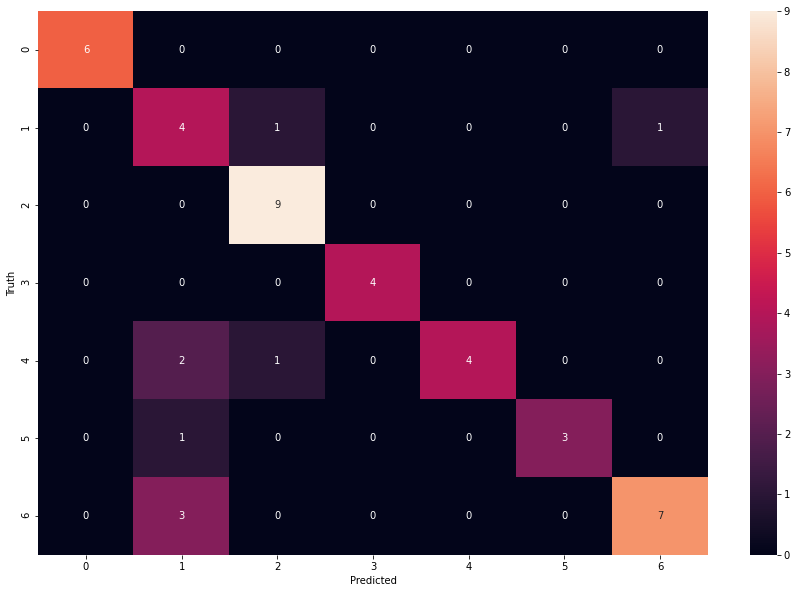

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
import seaborn as sn
plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Enter location of the image:C:\Users\Pratham\Sports_person_Project\model\image data\rishabh pant\rishabh-pant-saha-38.jpg

 rishabh pant
[3]


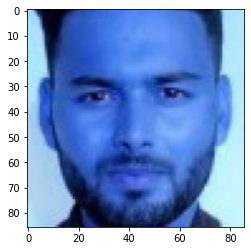

In [94]:
def to_predict(location):
    image=crop_if_2_eyes(location)
    out=[]
    for i in range(0,len(image)):
        plt.subplot(len(image),1,i+1)
        plt.imshow(image[i])
        if img is None:
            print("Image is not accessible")
            return
        scalled_img=cv2.resize(image[i],(32,32))
        img_har=wavelet(image[i],'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        out.append(combined_img)
        out_array=np.array(out[i]).reshape(1,4096).astype(float)
        output=best_clf.predict(out_array)
        if output is None:
            return
        for keys,values in celeb_dict.items():
            if output==values:
                print("\n",keys)
        print(output)

location=input("Enter location of the image:")
to_predict(location)    

# to install any module

In [64]:
!pip install joblib

In [65]:
import joblib 
joblib.dump(best_clf,'Sports_Classifier_model.pkl')

['Sports_Classifier_model.pkl']

array([0])

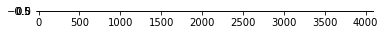

In [70]:
plt.imshow([x[12]])
best_clf.predict([x[12]])